## ENDG 310 Fall 2023
## Lab 2
### Reading and Displaying Data

In this lab, you will analyze global $CO_2$ data and Canadian forest fire data utilizing datasets from the Government of Canada and from the U.S. National Oceanic and Atmospheric Administration.  

### Objectives
After completing this lab, you should be able to:
- Checkout, commit, and sync a github repository.  
- Create and use a `.gitignore` file.
- Load and plot data from csv and xls files.
- Manipulate data and find statistics.
- Create an visual infographic that summarizes your interpretation of the data.

### Lab submission
This lab is due at 5:00 PM on Friday, September 29th via github.  Be sure to **commit** and **push** your final code prior to the final deadline.  You submit the following:
- all code you used, either as `ipynb` or `py` files.
- a README.md file, properly formatted with headings and explainations, which summarizes the lab and your results and must include your final infographic.

You may create a new `ipynb` or `py` files or use this one.

## Step 1: Data
Global $CO_2$ data may be obtained from the **Global Monitoring Laboratory** at the **Mauna Loa Observatory** in the Hawaiian Islands by visiting this __[link](https://gml.noaa.gov/ccgg/trends/data.html)__.  You may use the daily or monthly data.

There are multiple sources available for wildfire data in Canada.  The simplest data source is the summary statistics from Natural Resources Canada, found __[here](https://cwfis.cfs.nrcan.gc.ca/datamart/download/nfdbpnt)__.  Data from 2022 and estimated data for 2023 will need to be appended manually as the data only goes through 2021.  A visual of all burned area for the past 100 years can be seen __[here](https://canadiangeographic.ca/articles/mapping-100-years-of-forest-fires-in-canada/)__.

**IMPORTANT**: create a `data` folder and place the data files there.  Add the `data` folder to your `.gitignore` file as those files should **not** be included as part of your repository.  Include a discussion of your source of data and where you expect a user to place the data files when downloaded if they checkout your repository.

Once you have downloaded the data, load the data using `numpy` or `pandas`.  Ask ChatGPT to suggest code.  You may need to reformat the data files.  **If you use ChatGPT**, include the prompt you used to get the proper code snippet as a comment before your code.

In [4]:
"""
Your code can go here or in a separate file.
"""
import pandas as pd
#monthly CO2 data
#converting data in csv file into dataframe
data_co2 = pd.read_csv('Lab2Data/co2_mm_mlo.csv',comment="#")
data_co2.head()
#monthly data in red (average)
#seasonal data in black.(deseasonalized)

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [5]:
#Loading excel file containing wild fire data
import pandas as pd
#load excel data into dataFrame
data_wildfires = pd.read_excel("Lab2Data/NFDB_point_stats.xlsx", sheet_name="NFDB_Summary_Stats", usecols="A:F", engine="openpyxl", header = 4)
#the above code does not work when the actual excel file is open- this is because the file would be read-locked by another program

#create excel file with just valid values, and read that file with the needed information
# convert values in years column to numeric values
data_wildfires['YEAR']= pd.to_numeric(data_wildfires['YEAR'], errors = 'coerce')

#ignore all values that are not made up fully of numbers; change them to NaN
data_wildfires = data_wildfires.dropna(subset=['YEAR'])

#convert values in the 'YEARS' colums to integers
data_wildfires['YEAR']= data_wildfires['YEAR'].astype(int)

#print the first five rows of the data
data_wildfires.head()


,YEAR,FIRES,TOTAL_HA,MAX_SIZE_HA,FIRES >200ha,TOTAL_HA (>200ha)
0,2023,6277.0,1.733090e+07,NaN,NaN,NaN
1,2022,5726.0,1.656504e+06,NaN,NaN,NaN
2,2021,6709.0,4.078897e+06,271700.519953,596.0,4.038710e+06
3,2020,4001.0,2.182320e+05,50892.000000,80.0,2.061530e+05
4,2019,4062.0,1.786214e+06,350135.000000,192.0,1.765436e+06


## Step 2: Plot the data
Recreate the following plots using `Matplotlib`.  You may use `Plotly` or other tools, however, start simple.

### Historical fire data
<img src="./images/nrcan_historical_fires.png" alt="NRCan summary of annual wild fires" title="Annual burned area in Canada"/>

Note: you should include 2022 and 2023 data in your plot.  You may add these data points to the data file directly.

### Atmospheric $CO_2$ data
<img src="./images/co2_trend_mlo.png" alt="Historic atmospheric CO2 data" title="Atmospheric CO2 data from Mauna Loa Observatory" />

Note: you should include data through the end of June 2023.

'\nNeed to:\n    make labels more legible\n    add trendline\n    add title and legend\n    \n'

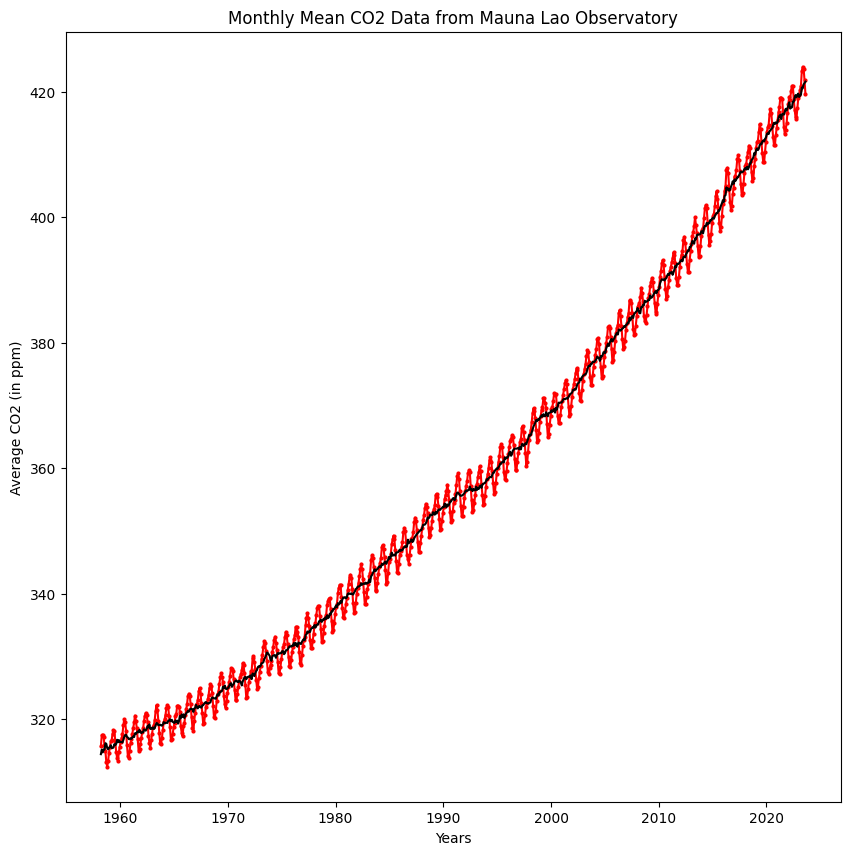

In [31]:
"""
Code should be well formatted and well commented.  You may put your code here or in a separate file.
"""
import matplotlib.pyplot as plt
#creating plot for CO2 data
plt.figure(figsize=(10, 10))

plt.plot(data_co2['decimal date'], data_co2['average'], color = 'red', marker= 'o', markersize = 2)
plt.xlabel('Years')
plt.ylabel("Average CO2 (in ppm)")

plt.plot(data_co2['decimal date'], data_co2['deseasonalized'], color = 'black')

plt.title("Monthly Mean CO2 Data from Mauna Lao Observatory")

#save graph as a png
plt.savefig('CO2_data.png', dpi=300, bbox_inches='tight')



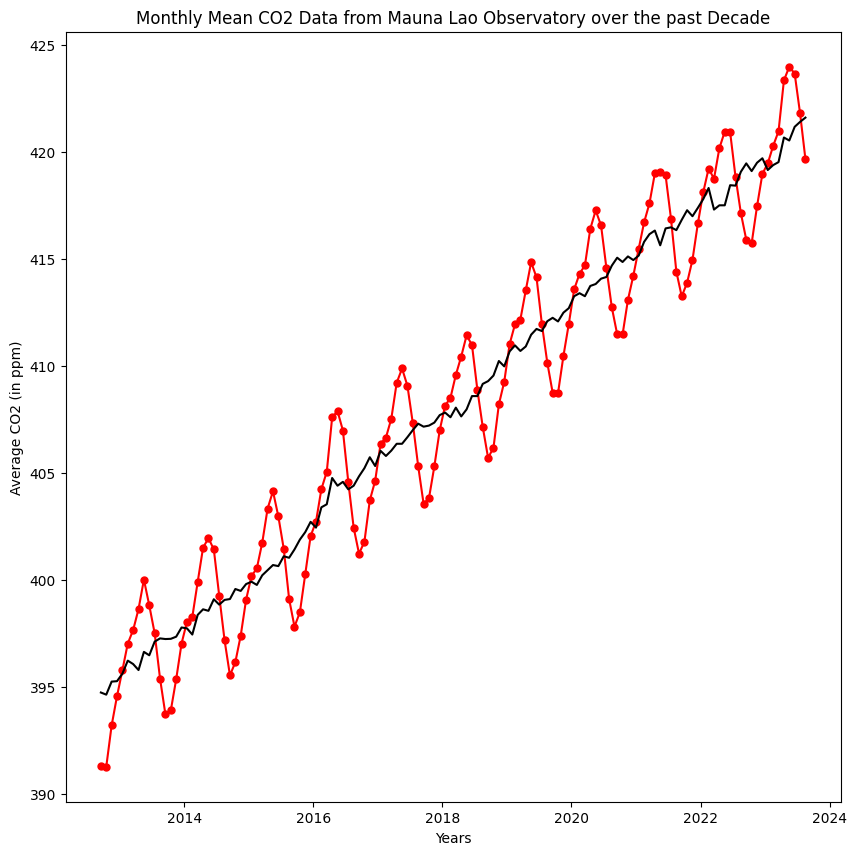

In [7]:
import matplotlib.pyplot as plt
#Creating plot for more recent c02 data

#access dataframe items starting from year 2013
recent_co2 =data_co2.iloc[654: ,]
plt.figure(figsize=(10, 10))

#create the plot for recent co2 data
plt.plot(recent_co2['decimal date'], recent_co2['average'], color = 'red', marker= 'o', markersize = 5)
plt.xlabel('Years')
plt.ylabel("Average CO2 (in ppm)")

plt.plot(recent_co2['decimal date'], recent_co2['deseasonalized'], color = 'black') #gives the trend line of data?

plt.title("Monthly Mean CO2 Data from Mauna Lao Observatory over the past Decade")

#save plot as png
plt.savefig('Recent_CO2_data.png', dpi=300, bbox_inches='tight')


'fix line plot'

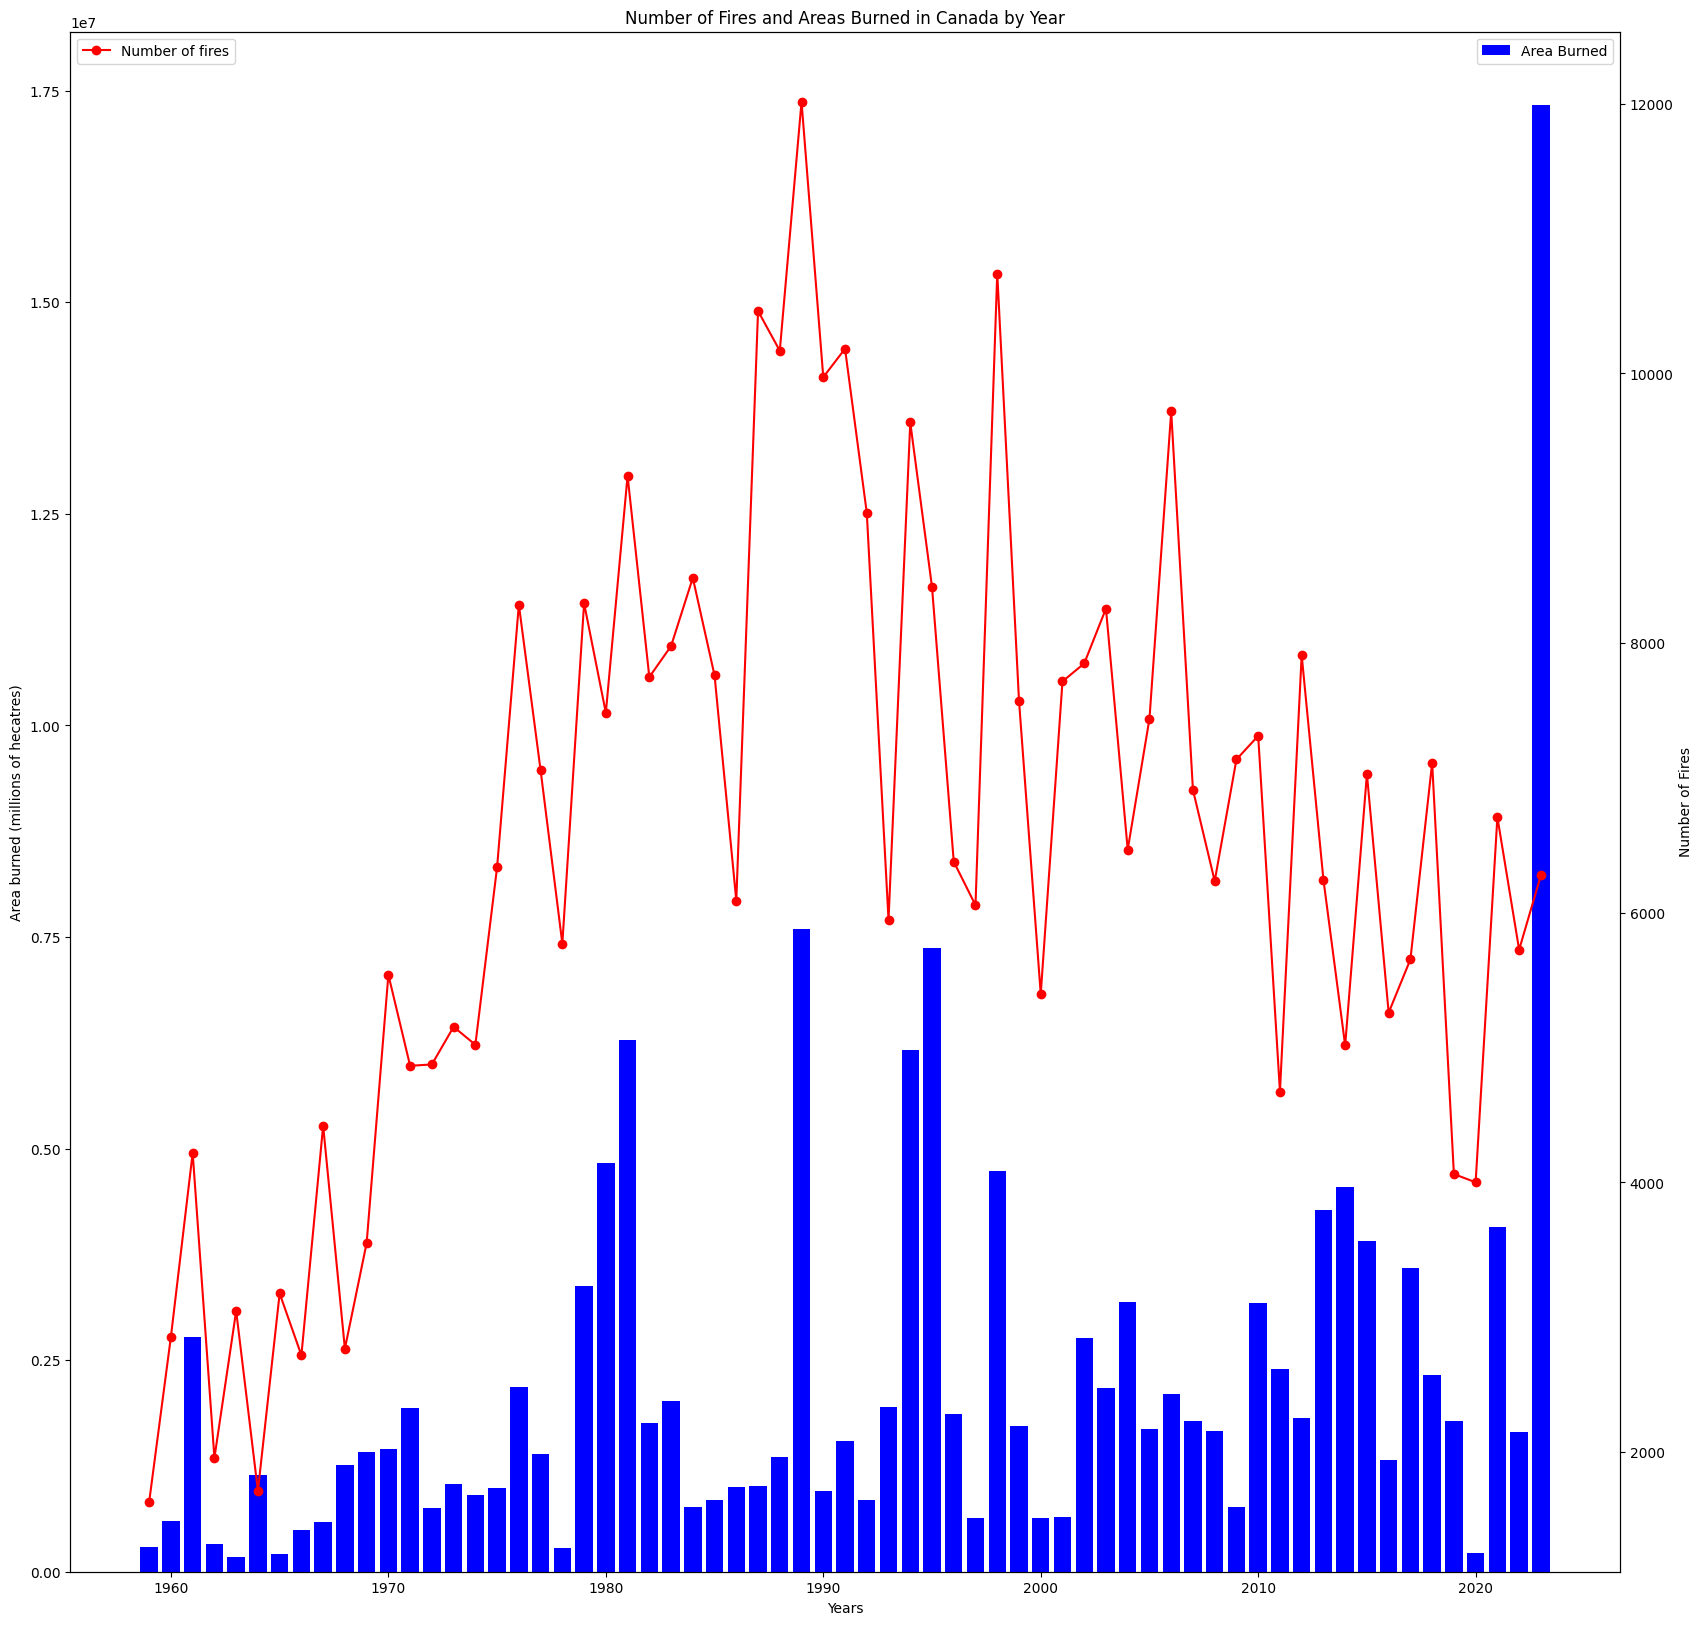

In [8]:
import matplotlib.pyplot as plt
#create data visuals from data tables using matplot.lib
#create a figure and an axis
fig, ax1 = plt.subplots(figsize = (20,20))
#create a bar graph
ax1.bar(data_wildfires['YEAR'], data_wildfires['TOTAL_HA'], color= "blue", label= 'Area Burned') #the label gives a title for the legend
#set the labels of the bar graph
ax1.set_xlabel('Years')
ax1.set_ylabel("Area burned (millions of hecatres)")

#create a secondary y-axis and plot the line data
ax2= ax1.twinx() #create a secondary y-axis sharing the same x-axis-this prevents the line plot from sitting on the x-axis
ax2.plot(data_wildfires['YEAR'], data_wildfires["FIRES"], color= "red", marker = 'o', label="Number of fires")
ax2.set_ylabel("Number of Fires")

ax1.set_title("Number of Fires and Areas Burned in Canada by Year")
ax1.legend(loc= "upper right")
ax2.legend(loc= "upper left")

#save plot as png
plt.savefig("Fires_and_areas_burned.png", dpi=300, bbox_inches='tight')



## Part 3: Analyze the data
Create summary statistics based on the data, and determine if there are any relationships in the data.  These can include:
- Compute and plot the annual increase in $CO_2$ in each year.
- Compute and plot the annual increase in $CO_2$ each summer and decrease in $CO_2$ each winter.
- Compare the annual increase in $CO_2$ with annual wildfire burn area.
- etc.

You must show at least three different computed values or cross plots, one of which must be different from those suggested above.  At least two of the computed values should be time series.

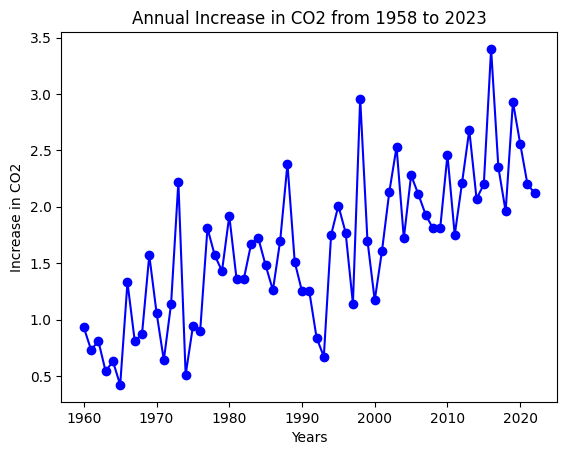

In [30]:
"""
Your code can go here or in a separate file.
"""

import pandas as pd
import matplotlib.pyplot as plt

#create data frame with annual CO2 data

annual_co2 = pd.read_csv('Lab2Data/co2_annmean_mlo.csv',comment="#")
annual_co2.head()


# access the mean data for each year
#calculate the difference between the annual data sets
annual_co2["Annual_Increase_CO2"]= annual_co2["mean"].diff()

#plot the increase
plt.plot(annual_co2['year'], annual_co2["Annual_Increase_CO2"], marker = 'o', color='blue')
plt.xlabel('Years')
plt.ylabel('Increase in CO2')
plt.title('Annual Increase in CO2 from 1958 to 2023')

#save the plot as a png
plt.savefig("Annual_Increase_in_CO2_from_1958.png", dpi =300, bbox_inches='tight')





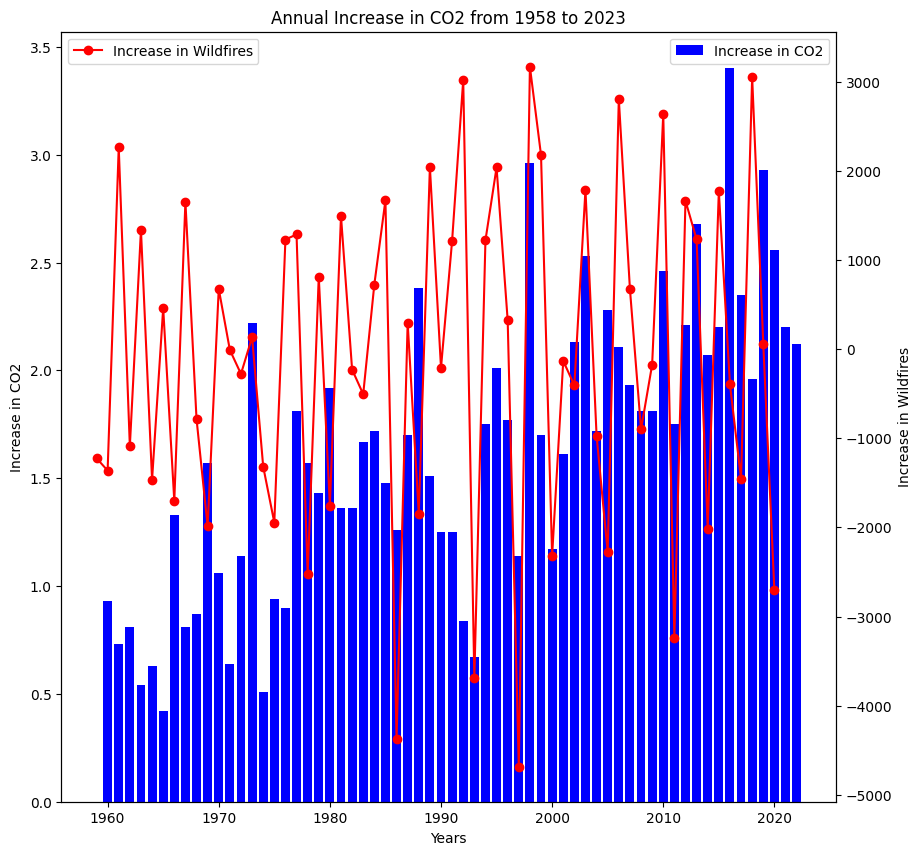

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


# access the mean data for each year
#calculate the difference between the annual data sets
annual_co2["Annual_Increase_CO2"]= annual_co2["mean"].diff()

#plot increase in co2
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.bar(annual_co2['year'], annual_co2["Annual_Increase_CO2"], 
        color='blue', label = 'Increase in CO2')
ax1.set_xlabel('Years')
ax1.set_ylabel('Increase in CO2')
ax1.set_title('Annual Increase in CO2 from 1958 to 2023')
ax1.legend(loc = "upper right")

#plot increase in wildfires
#calculate increase in wildfires
data_wildfires["Annual_Increase_wildfires"]= data_wildfires["FIRES"].diff()
ax2 = ax1.twinx()
ax2.plot(data_wildfires['YEAR'], data_wildfires["Annual_Increase_wildfires"], 
         marker = 'o', color = 'red', label ='Increase in Wildfires')
ax2.set_ylabel('Increase in Wildfires')
ax2.legend(loc='upper left')

#save the plot as a png
plt.savefig("Annual_Increase_in_CO2.png", dpi =300, bbox_inches='tight')

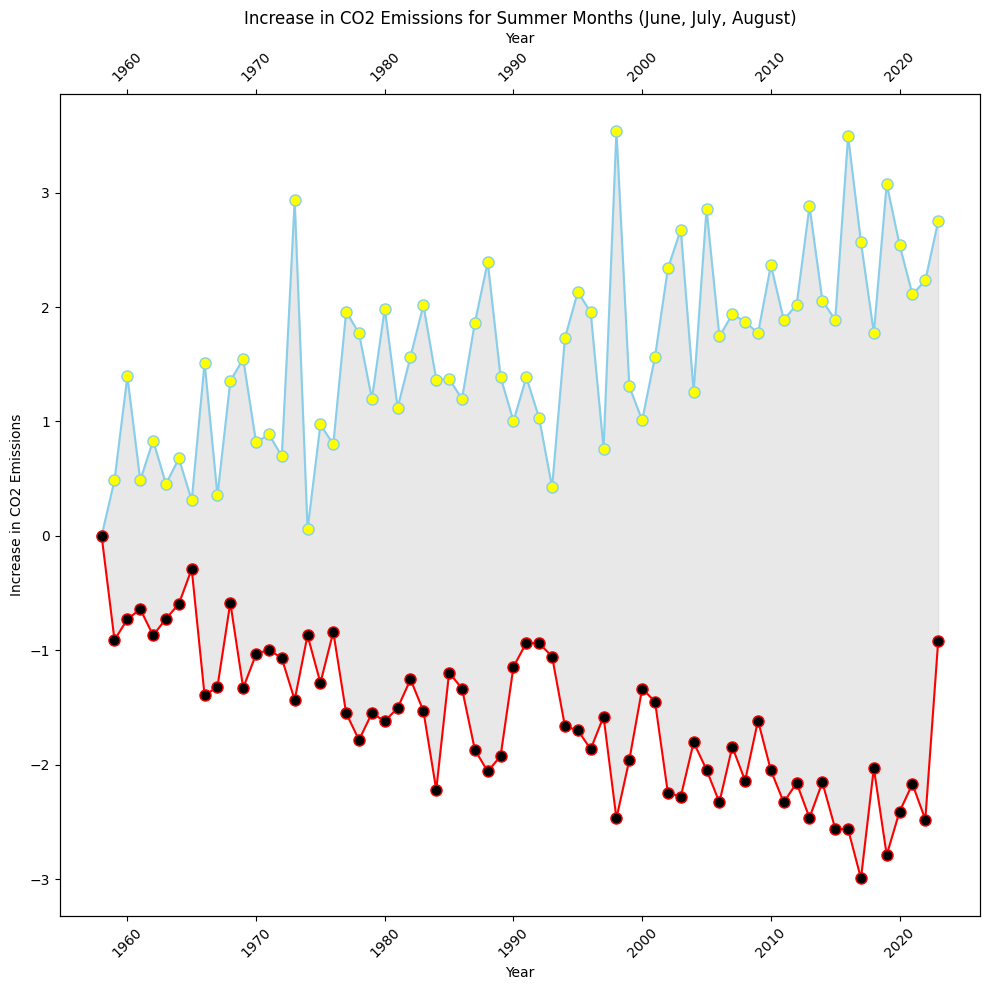

In [73]:
#create data for annual CO2 increase in summer and decrease in winter
import pandas as pd
import matplotlib.pyplot as plt

#access the summer data from the csv file
#data_co2['Date']
fig, graph1= plt.subplots(figsize = (10, 10))

# Filter the DataFrame to select only summer months
summer_df = data_co2[(data_co2['month'] >= 6) & (data_co2['month'] <= 8)]

# Group the summer data by year and calculate the increase in CO2 emissions
summer_increase = summer_df.groupby('year')['average'].mean().diff().fillna(0)

# Create a bar plot to visualize the increase in CO2 emissions for each year
graph1.plot(summer_increase.index, summer_increase.values, color='skyblue', marker = 'o',markersize=8, markerfacecolor = 'yellow')
graph1.set_xlabel('Year')
graph1.set_ylabel('Increase in CO2 Emissions')
graph1.set_title('Increase in CO2 Emissions for Summer Months (June, July, August)')
plt.xticks(rotation=45)
#graph1.tight_layout()


winter_df = data_co2[(data_co2['month'] == 12)| (data_co2['month'] == 1)|(data_co2['month']==1)]

# Group the summer data by year and calculate the increase in CO2 emissions
winter_decrease = winter_df.groupby('year')['average'].mean().diff().fillna(0)

graph2= graph1.twiny()
# Create a bar plot to visualize the increase in CO2 emissions for each year
graph2.plot(winter_decrease.index,-winter_decrease.values, color='red',marker ='o', markersize=8, markerfacecolor= "black")
graph2.set_xlabel('Year')
graph2.set_ylabel('Decrease in CO2 Emissions')

#fill the space between two graphs
graph1.fill_between(winter_decrease.index, summer_increase.values, -winter_decrease.values, 
                    where=(summer_increase.values > -winter_decrease.values), color='lightgray',  
                    alpha=0.5, interpolate=True, label='Fill Area')


plt.xticks(rotation=45)
plt.tight_layout()

#save the plot
plt.savefig("Summer_increase_and_winter_decrease.png", dpi=300, bbox_inches = 'tight')


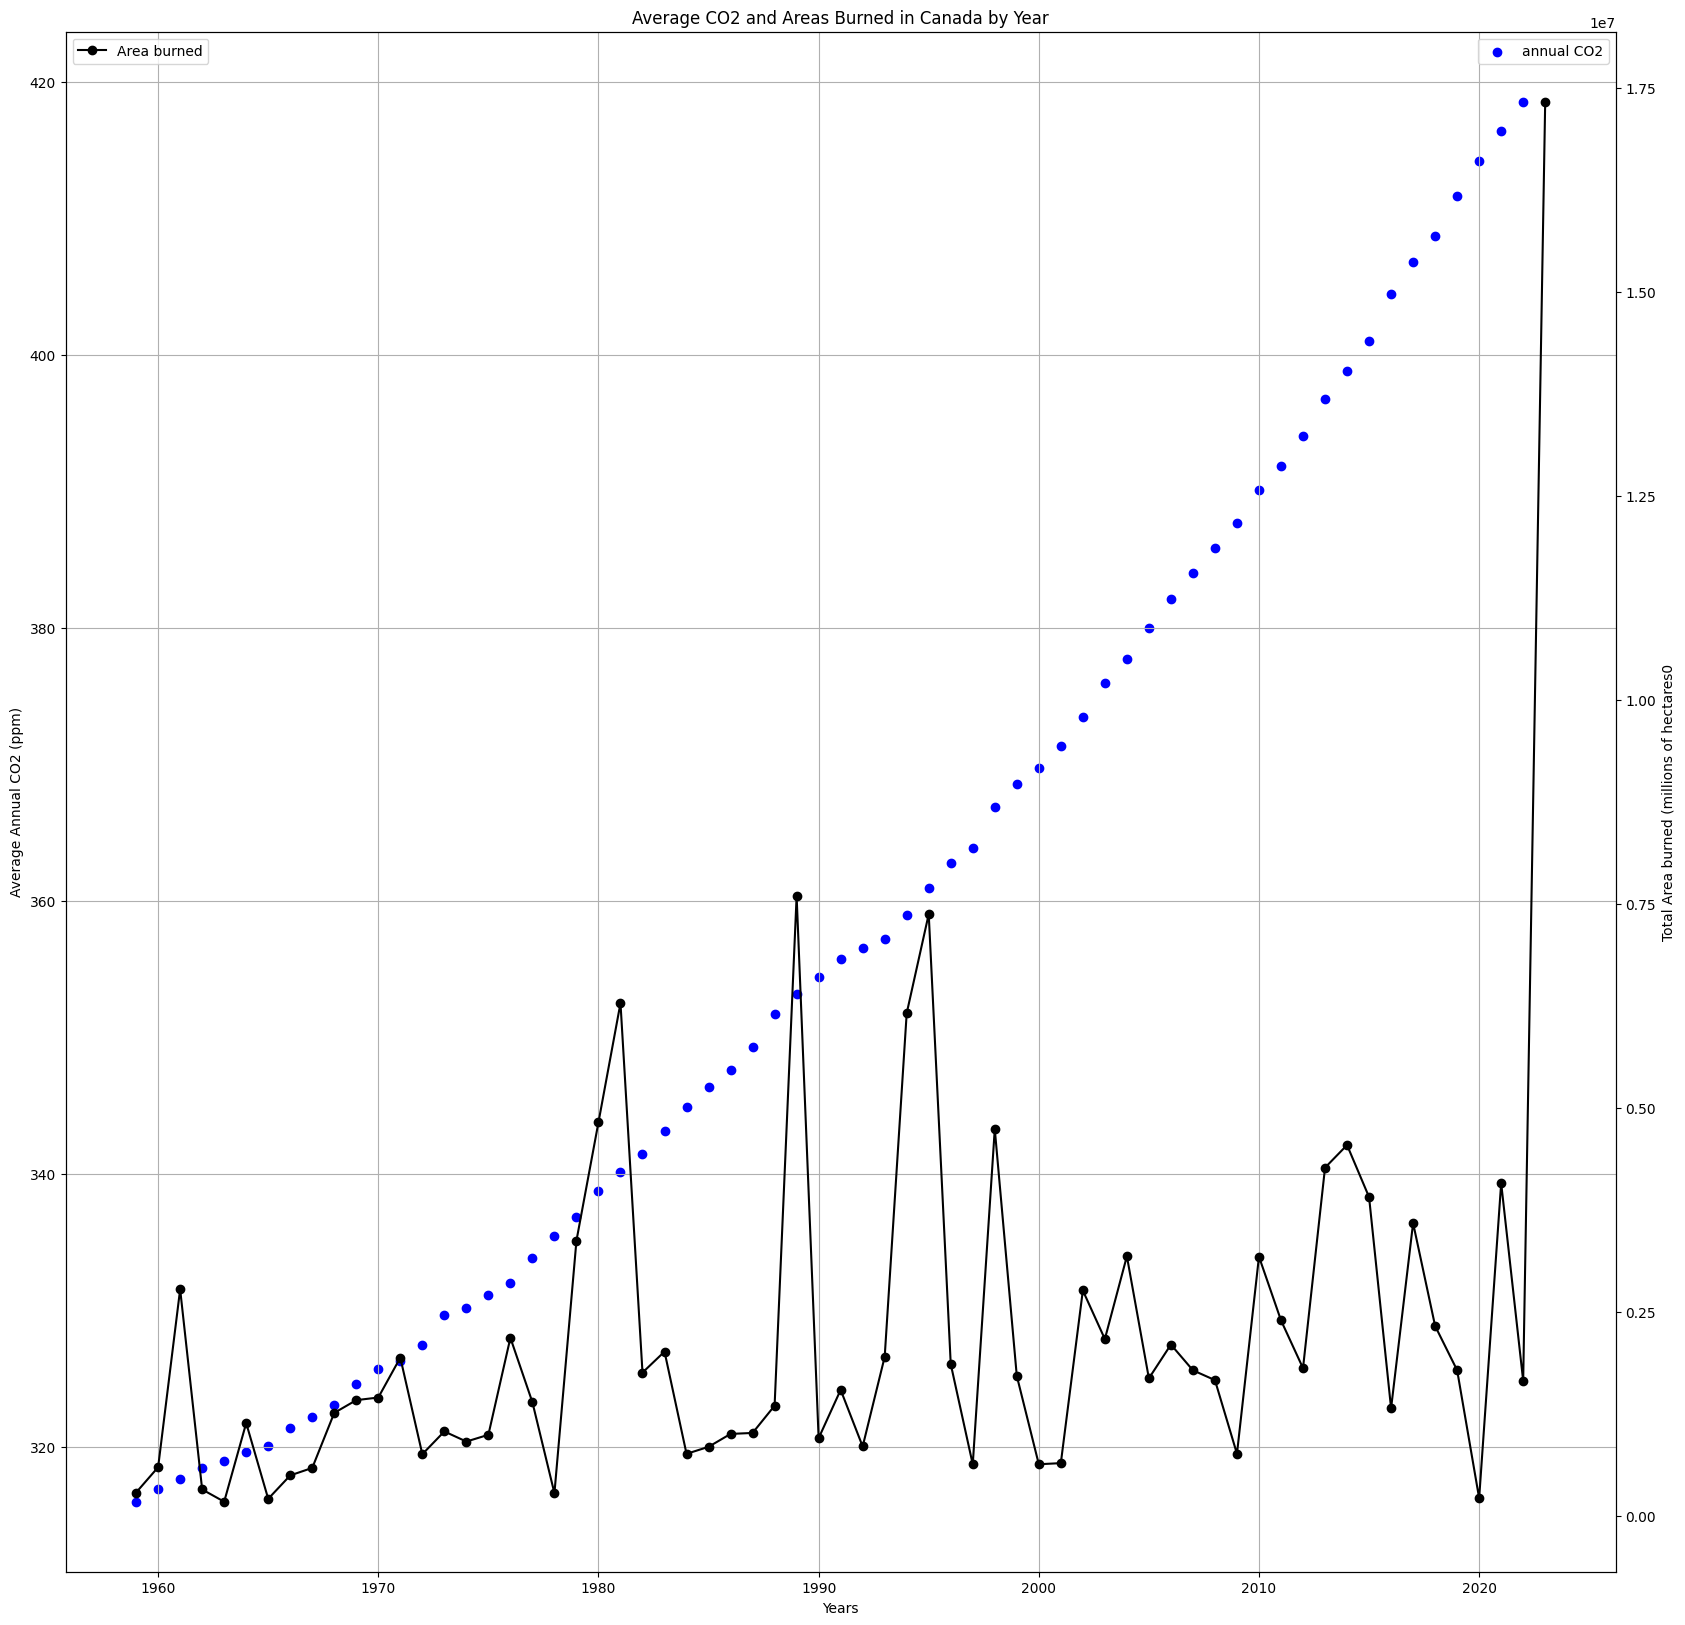

In [12]:
#comparing the annual amounts of CO2 with the increase in wildfire burn areas

import pandas as pd
import matplotlib.pyplot as plt
fig, plot1 = plt.subplots(figsize = (20,20))
plot1.scatter(annual_co2['year'], annual_co2["mean"], color = 'blue', label = "annual CO2")
plot1.set_xlabel('Years')
plot1.set_ylabel('Average Annual CO2 (ppm)')




#create a secondary y-axis and plot the line data
plot2= plot1.twinx() #create a secondary y-axis sharing the same x-axis-this prevents the line plot from sitting on the x-axis
plot2.plot(data_wildfires['YEAR'], data_wildfires["TOTAL_HA"], color= "black", marker = 'o', label="Area burned")
plot2.set_ylabel("Total Area burned (millions of hectares0")

#Set graph details
plot1.set_title("Average CO2 and Areas Burned in Canada by Year")
plot1.grid(True)
plot1.legend(loc= "upper right")
plot2.legend(loc= "upper left")

#save plot as png
plt.savefig("CO2_and_Areas_Burned.png", dpi=300, bbox_inches = 'tight')


<class 'pandas.core.series.Series'>


[]

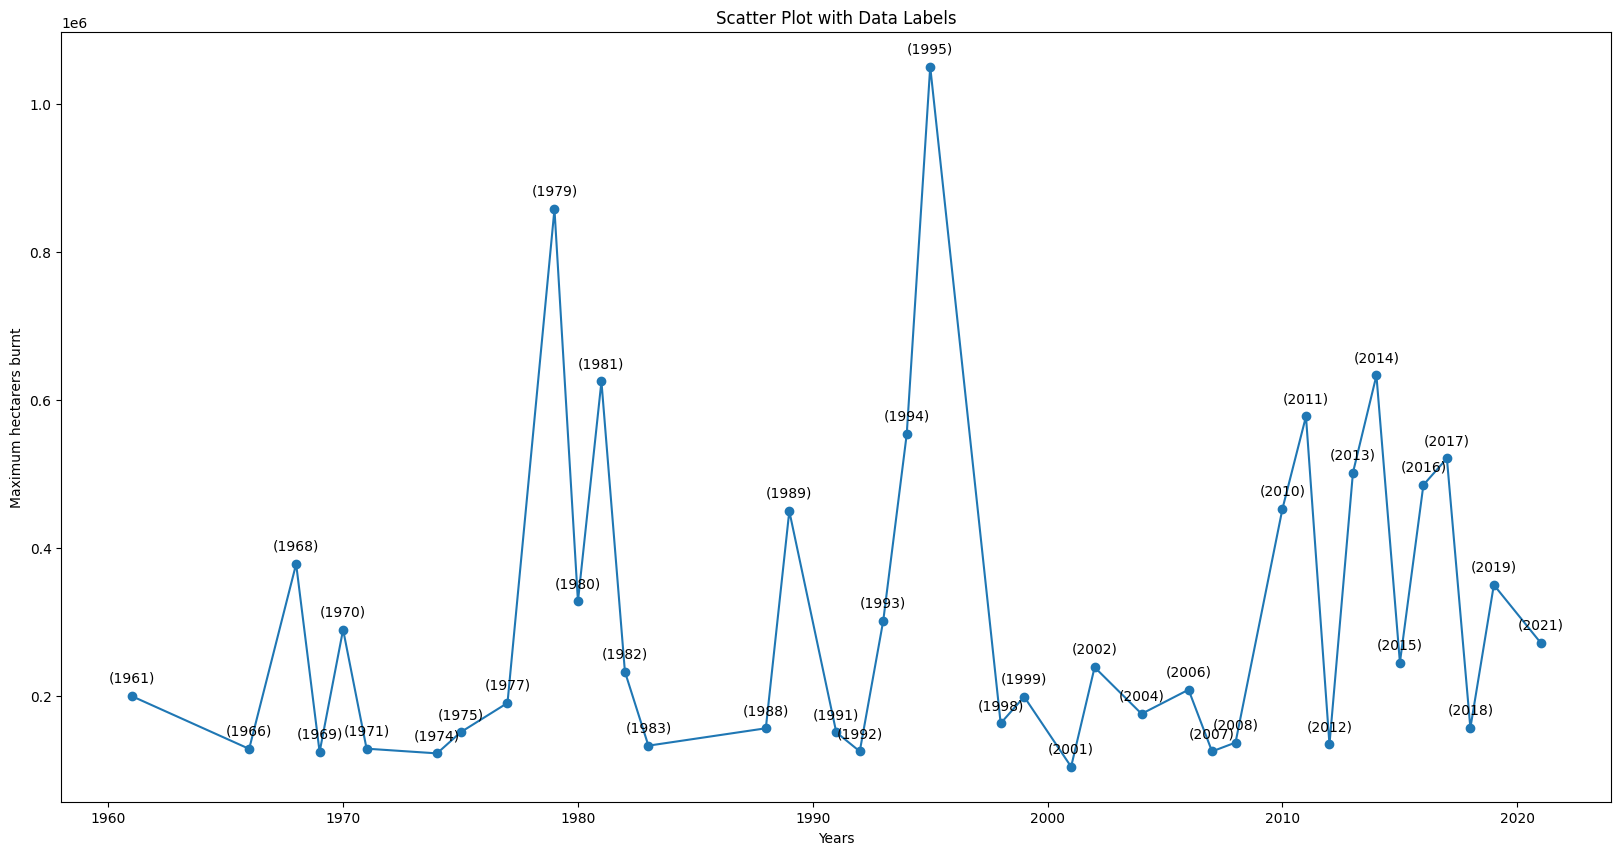

In [13]:


#plot the annual/seasonal increase in wildfires
#plot against max size of fires.

# convert values in years column to numeric values
data_wildfires = data_wildfires.dropna(subset=['MAX_SIZE_HA'])

#ignore all values that are not made up fully of numbers; change them to NaN
data_wildfires = data_wildfires.dropna(subset=['MAX_SIZE_HA'])

print(type(data_wildfires['MAX_SIZE_HA']))

data_wildfires['MAX_SIZE_HA']= data_wildfires['MAX_SIZE_HA'].astype(int)

high_fires = data_wildfires[data_wildfires["MAX_SIZE_HA"] >= 100000]
plt.figure(figsize=(20,10))
plt.plot(high_fires['YEAR'],high_fires['MAX_SIZE_HA'], marker='o')



# Add data labels using the annotate() function
for xi, yi in zip(high_fires['YEAR'], high_fires['MAX_SIZE_HA']):
    plt.annotate(f'({xi})', (xi, yi), textcoords="offset points", xytext=(0,10), ha='center')


# Add labels and title
plt.xlabel("Years")
plt.ylabel("Maximum hectarers burnt")
plt.title("Scatter Plot with Data Labels")

# Savve the plot
plt.savefig("High_Fires.png", dpi=300, bbox_inches='tight')

plt.plot()



In [ ]:
#Plotting the annual increase in CO2 versus the annual increase in #wildfires.
#the year after peak co2, there was a peak in wildfires
#show how there is an increase in the trate of wildfires as well as co2, and show how both increases 
#are related to one another, then show the plot of wildfire vs co2. try to highlight the suddent #
#spike in wilfires over the past three years, and see what that has been caused by



## Part 4: Create an infographic
Combine several relevant plots into a single figure to create an infographic.  For more information about infographics and some examples, click __[here](https://infogram.com/page/infographic)__.  You may add some text, and you are encouraged to use different types of plots, for examples, see __[here](https://matplotlib.org/stable/gallery/index.html)__.

Save your final figure as a `jpg` or `png` file, and make sure it is included (and displayed) in the `README`.

Your infographic should include at least 3 different subplots showing at least 4 different time or data series.  The infographic must be easy to read and understand and should contain sufficient labels and information to convey your message.

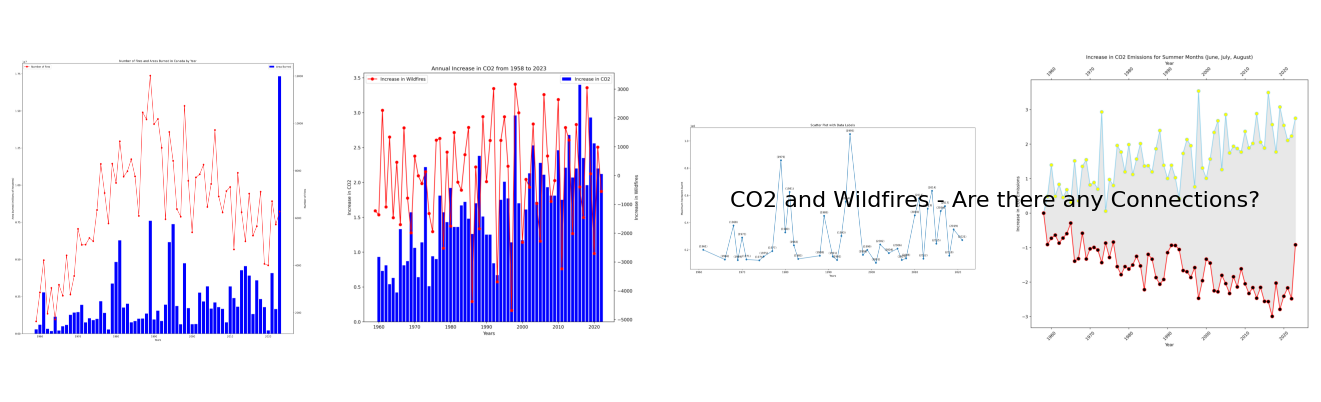

In [32]:
"""
Your code can go here or in a separate file.
"""
import matplotlib.pyplot as plt
#Chat GPT prompt: I want to create an infographic with three images of plots/graphs.  
# This is the code I have:  import matplotlib.pyplot as plt
# Create a figure for the infographic

fig = plt.figure(figsize=(20, 20))

# Add subplots for the images
ax1 = fig.add_subplot(5, 6, 1)  # First image
ax2 = fig.add_subplot(5, 6, 2)  # Second image
ax3 = fig.add_subplot(5, 6, 3)  # Third image
ax5 = fig.add_subplot(5, 6, 4)  #Fourth image

# Load the saved chart images
chart_image1 = plt.imread("Fires_and_Areas_Burned.png")
chart_image2 = plt.imread("Annual_Increase_in_CO2.png")
chart_image3 = plt.imread("High_Fires.png")
chart_image4 = plt.imread("Summer_increase_and_winter_decrease.png")

# Display the images on their respective subplots
ax1.imshow(chart_image1)
ax2.imshow(chart_image2)
ax3.imshow(chart_image3)
ax5.imshow(chart_image4)
# Add text
title = "CO2 and Wildfires - Are there any Connections?"
ax4 = fig.add_subplot(5, 6, (3, 4))  # Subplot for text
ax4.text(0.5, 0.5, title, fontsize=16, ha='center', va='center')

# Remove ticks and labels for all subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.axis('off')


# Adjust layout
plt.tight_layout()

# Show the infographic
plt.show()


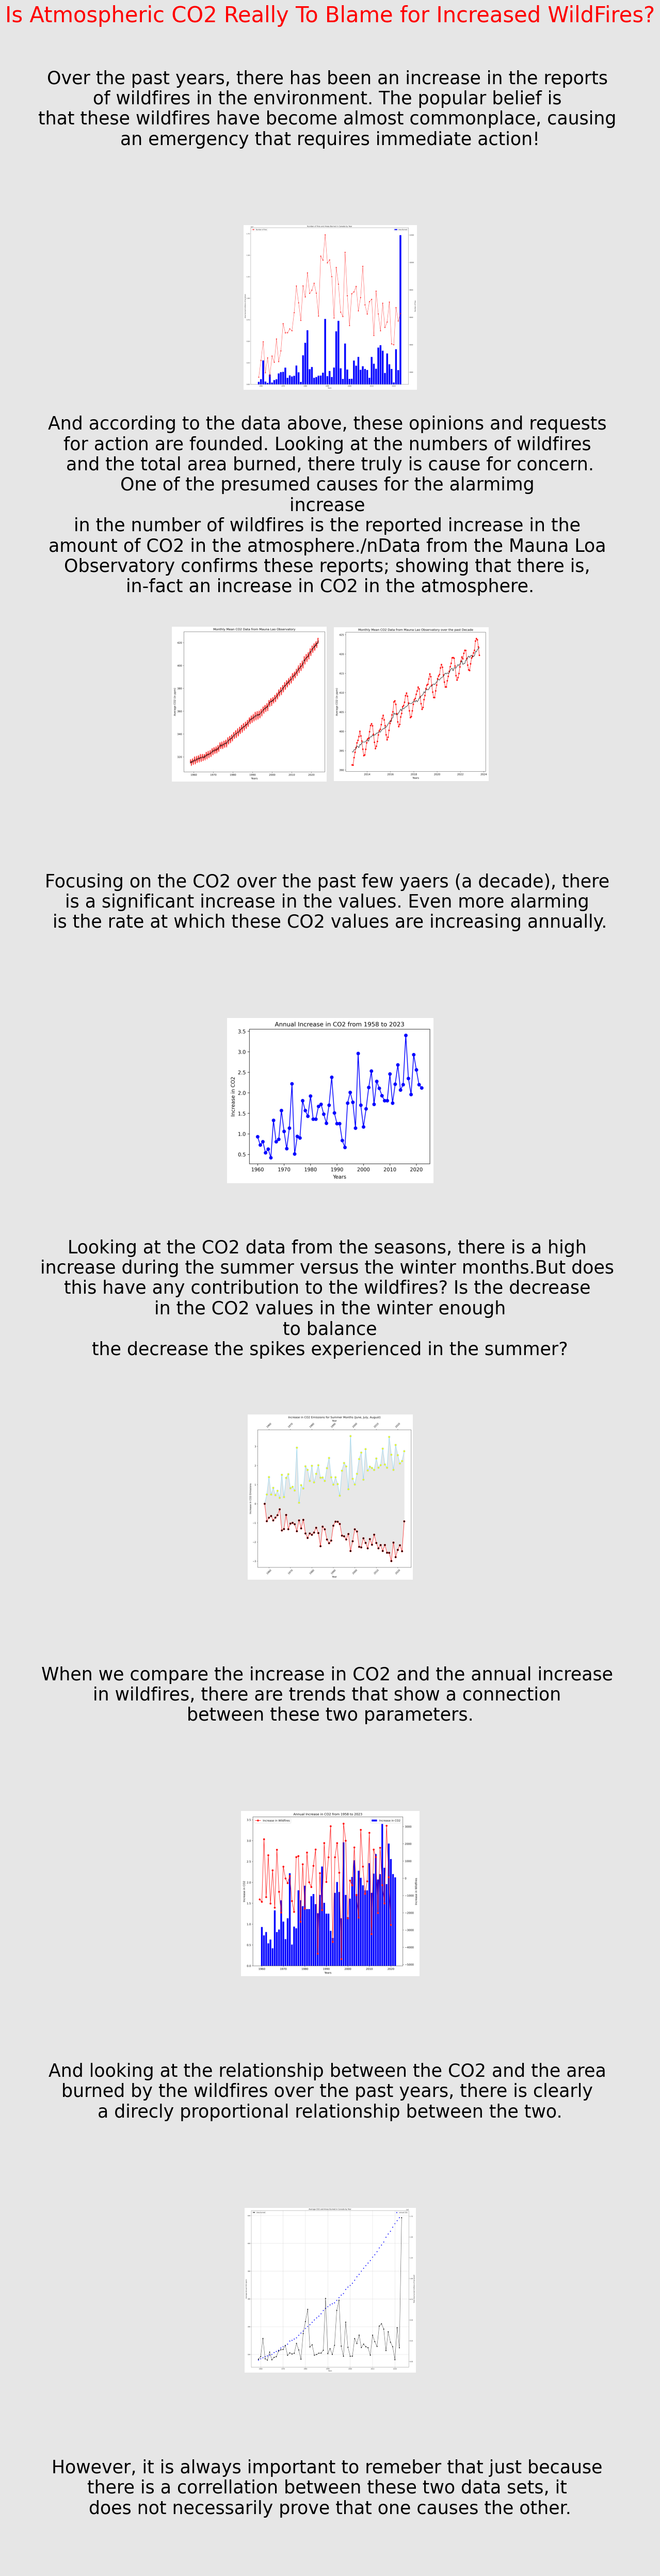

<Figure size 640x480 with 0 Axes>

In [1]:
"""
Your code can go here or in a separate file.
"""
import matplotlib.pyplot as plt
#Chat GPT prompt: I want to create an infographic with three images of plots/graphs.  
# This is the code I have:  import matplotlib.pyplot as plt
# Create a figure for the infographic


fig = plt.figure(figsize=(10, 50))
fig.set_facecolor('#e6e6e6')
'''
# Add subplots for the images
ax1 = fig.add_subplot(2, 6,(1,2))  # Text 1
ax2 = fig.add_subplot(4, 6,(7,8) )  # Image 1
ax3 = fig.add_subplot(4, 6,(13,14) )  # text 2
ax4= fig.add_subplot(4, 6, 19)  # image 2
ax5 = fig.add_subplot(4, 6, 20 )  # image 3
ax6 = fig.add_subplot(4,6, (3,4) )  #text 3
ax7 = fig.add_subplot(4,6, (9,10) )  #image 4
ax8 = fig.add_subplot(4,6, (15,16))  #text 4
ax9 = fig.add_subplot(4,6, (21,22))  #image 5
ax10 = fig.add_subplot(4,6, (5,6))  #text 5
ax11 = fig.add_subplot(4,6, (11,12) )  #image 6
ax12 = fig.add_subplot(4, 6, (17,18) ) #text 6
ax13 = fig.add_subplot(4, 6, (23,24) ) #image 7
'''

#add Infographic title
plt.title("Is Atmospheric CO2 Really To Blame for Increased WildFires?", fontsize = 30, color = "red")
plt.axis("off")

# Add subplots for the images
ax1 = fig.add_subplot(13, 2,(1,2))  # Text 1
ax2 = fig.add_subplot(13, 2,(3,4) )  # Image 1
ax3 = fig.add_subplot(13, 2,(5,6) )  # text 2
ax4= fig.add_subplot(13, 2, 7)  # image 2
ax5 = fig.add_subplot(13, 2, 8 )  # image 3
ax6 = fig.add_subplot(13 ,2, (9, 10) )  #text 3
ax7 = fig.add_subplot(13, 2,(11,12) )  #image 4
ax8 = fig.add_subplot(13, 2, (13,14))  #text 4
ax9 = fig.add_subplot(13, 2, (15,16))  #image 5
ax10 = fig.add_subplot(13, 2, (17,18))  #text 5
ax11 = fig.add_subplot(13, 2, (19,20) )  #image 6
ax12 = fig.add_subplot(13, 2, (21, 22) ) #text 6
ax13 = fig.add_subplot(13, 2, (23, 24) ) #image 7
ax14 = fig.add_subplot(13, 2, (25,26) ) #text 7


#Reading all the images needed
chart_image1 = plt.imread("Fires_and_areas_burned.png")
chart_image2 = plt.imread("CO2_data.png")
chart_image3 = plt.imread("Recent_CO2_data.png")
chart_image4 = plt.imread("Annual_Increase_in_CO2_from_1958.png")
chart_image5 = plt.imread("Summer_increase_and_winter_decrease.png")
chart_image6 = plt.imread("Annual_Increase_in_CO2.png")
chart_image7 = plt.imread("CO2_and_Areas_Burned.png")

# Display the images on their respective subplots
ax2.imshow(chart_image1)
ax4.imshow(chart_image2)
ax5.imshow(chart_image3)
ax7.imshow(chart_image4)
ax9.imshow(chart_image5)
ax11.imshow(chart_image6)
ax13.imshow(chart_image7)

#text to be used
text1 = "Over the past years, there has been an increase in the reports \nof wildfires in the environment. The popular belief is \nthat these wildfires have become almost commonplace, causing \nan emergency that requires immediate action!"
text2 = '''And according to the data above, these opinions and requests \nfor action are founded. Looking at the numbers of wildfires \nand the total area burned, there truly is cause for concern.\nOne of the presumed causes for the alarmimg 
increase \nin the number of wildfires is the reported increase in the \namount of CO2 in the atmosphere./nData from the Mauna Loa \nObservatory confirms these reports; showing that there is, \nin-fact an increase in CO2 in the atmosphere.'''
text3 = "Focusing on the CO2 over the past few yaers (a decade), there \nis a significant increase in the values. Even more alarming \nis the rate at which these CO2 values are increasing annually."
text4 = '''Looking at the CO2 data from the seasons, there is a high \nincrease during the summer versus the winter months.But does \nthis have any contribution to the wildfires? Is the decrease \nin the CO2 values in the winter enough
 to balance \nthe decrease the spikes experienced in the summer?'''
text5 = '''When we compare the increase in CO2 and the annual increase \nin wildfires, there are trends that show a connection \nbetween these two parameters.'''
text6 = "And looking at the relationship between the CO2 and the area \nburned by the wildfires over the past years, there is clearly \na direcly proportional relationship between the two."
text7 = "However, it is always important to remeber that just because \nthere is a correllation between these two data sets, it \ndoes not necessarily prove that one causes the other."

# Add text to infographic
ax1.text(0.5, 0.5, text1, fontsize=25, ha='center', va='center')
ax3.text(0.5, 0.5, text2, fontsize=25, ha='center', va='center')
ax6.text(0.5, 0.5, text3, fontsize=25, ha='center', va='center')
ax8.text(0.5, 0.5, text4, fontsize=25, ha='center', va='center')
ax10.text(0.5, 0.5, text5, fontsize=25, ha='center', va='center')
ax12.text(0.5, 0.5, text6, fontsize=25, ha='center', va='center')
ax14.text(0.5, 0.5, text7, fontsize=25, ha='center', va='center')

#get rid of subplot axes
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14 ]:
    ax.axis('off')

#adjust layout
plt.tight_layout()

plt.show()
plt.savefig("Infographic.png", dpi=300, bbox_inches='tight')